$$
Importing\;libraries
$$

In [0]:
import numpy as np
import cv2
import random as rd
import math
import os
import matplotlib.pyplot as plt

$$
Question\;1(b):
$$

In [0]:
#reading the images and converting them to grayscale using cv2 libraries

image_data=cv2.imread('u2cuba.jpg')
gray_image = cv2.cvtColor(image_data, cv2.COLOR_BGR2GRAY)

kernel=cv2.imread('trailer.png')
gray_kernel = cv2.cvtColor(kernel, cv2.COLOR_BGR2GRAY)

#normalizing the filter so that it has 0 mean,varaince 1.
gray_kernel=(gray_kernel-np.mean(gray_kernel))/np.std(gray_kernel)

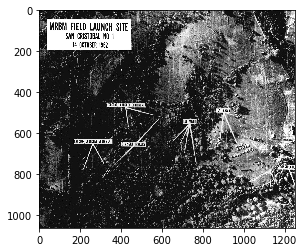

In [0]:
#plotting the image:
plt.imshow(gray_image, cmap='gray', vmin=0, vmax=255)

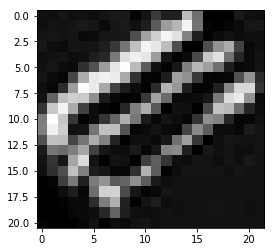

In [0]:
#ploting the filter:
plt.imshow(gray_kernel, cmap='gray', vmin=np.amin(gray_kernel), vmax=np.amax(gray_kernel))

In [0]:
#function for normalised cross correlation:

def NCC(Input,kernel):
  ncc=list()
  for i in range(0,Input.shape[0]-kernel.shape[0]+1):
    r=list()
    S=0
    for j in range(0,Input.shape[1]-kernel.shape[1]+1):
      mean=np.mean(Input[i:i+kernel.shape[0],j:j+kernel.shape[1]])
      std=np.std(Input[i:i+kernel.shape[0],j:j+kernel.shape[1]])
      if std==0:  
        S=np.sum(np.multiply((Input[i:i+kernel.shape[0],j:j+kernel.shape[1]]-mean),kernel))
      else:
        S=np.sum(np.multiply((Input[i:i+kernel.shape[0],j:j+kernel.shape[1]]-mean)/std,kernel))
      r.append(S)
    ncc.append(r)
  return ncc



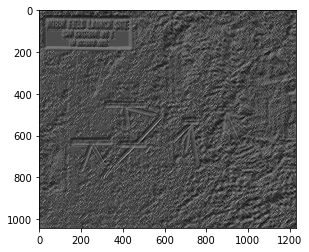

In [0]:
#implementing normalised cross correlation on given image and filter:
#displaying the heat map:
output=NCC(gray_image,gray_kernel)
plt.imshow(output, cmap='gray', vmin=np.amin(output), vmax=np.amax(output))

In [0]:
#calculating the position of highest intensity in the heat map:
col,row=np.where(output == np.amax(output))

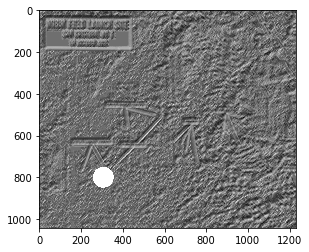

In [0]:
#ploting a small circle at highest intensity position:
output=np.array(output)
cv2.circle(output,(row,col), 10, np.amax(output), -1)
plt.imshow(output, cmap='gray', vmin=np.amin(output), vmax=np.amax(output))


$
\textbf{Reason for straight line artifacts:}
$



$
\textit{The template contains three parallel lines.}
$
$
\textit{The reason for straight line artifacts is some of the straight lines in image matches with one of the straight line in templates.}
$


$$
\textbf{Question 1(a):}
$$

In [0]:
#reading group photo and face data and converting them to grayscale image:
ncc_data=cv2.imread('data.png')
ncc_image = cv2.cvtColor(ncc_data, cv2.COLOR_BGR2GRAY)

face_kernel=cv2.imread('face_kernel.png')
face_kernel = cv2.cvtColor(face_kernel, cv2.COLOR_BGR2GRAY)

#normalising the face kernel:
face_kernel=(face_kernel-np.mean(face_kernel))/np.std(face_kernel)

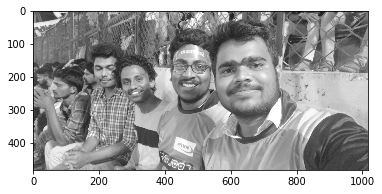

In [0]:
#ploting the group photo:
plt.imshow(ncc_image, cmap='gray', vmin=0, vmax=255)

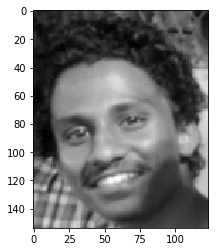

In [0]:
#plotting the face kernel:
plt.imshow(face_kernel, cmap='gray', vmin=np.amin(face_kernel), vmax=np.amax(face_kernel))

In [0]:
#correlation on group photo and my photo:
face_corr=NCC(ncc_image,face_kernel)

In [0]:
#calculating the position of highest intensity:
col1,row1=np.where(face_corr == np.amax(face_corr))

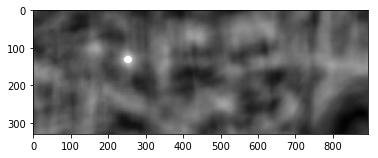

In [0]:
#plotting circle at highest intensity in heat map
face_corr=np.array(face_corr)
cv2.circle(face_corr,(row1,col1), 10,np.amax(face_corr) , -1)
plt.imshow(face_corr, cmap='gray', vmin=np.amin(face_corr), vmax=np.amax(face_corr))


$
\textbf{Question 1(c):}
$

In [0]:
#reading the images and converting them to grayscale using cv2 libraries
ncc_data1c=cv2.imread('u2cuba.jpg')
ncc_image1c = cv2.cvtColor(ncc_data1c, cv2.COLOR_BGR2GRAY)

kernel1c=cv2.imread('trailerSlightlyBigger.png')
kernel1c = cv2.cvtColor(kernel1c, cv2.COLOR_BGR2GRAY)

#normalizing the filter so that it has 0 mean,varaince 1.
kernel1c=(kernel1c-np.mean(kernel1c))/np.std(kernel1c)

In [0]:
#calculating the output:
output_1c=NCC(ncc_image1c,kernel1c)

In [0]:
#calculating the position where the intensity is maximum:
col1c,row1c=np.where(output_1c == np.amax(output_1c))

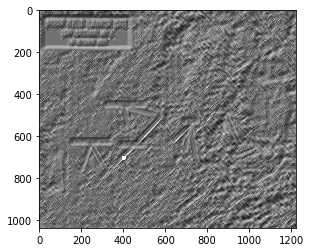

In [0]:
output_1c=np.array(output_1c)
cv2.circle(output_1c,(row1c,col1c), 10, np.amax(output_1c), -1)
plt.imshow(output_1c, cmap='gray', vmin=np.amin(output_1c), vmax=np.amax(output_1c))

$$
\textbf{Observations:}
$$
$$
\implies \textit{The results differ because the size of template is slightly bigger than it is in the image itself.}
$$
$$
\implies \textit{Limitations of correlation:correlation fails to detect the template properly if the size of template is slighty bigger than itself in the image.}
$$